# Tugas Besar - IF2220 - Probabilitas dan Statistika
**Penarikan kesimpulan dan pengujian hipotesis**

Enam Langkah Testing:
1. Tentukan Hipotesis nol (H_0: θ = θ_0), dimana θ bisa berupa μ, σ^2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).

2. Pilih hipotesis alternatif H1 salah dari dari θ > θ_0, θ < θ_0, atau θ ≠ θ_0
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK H_0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H_0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan.

Catatan : _ menandai subscript, ^ menandai superscript

# Soal
Diberikan sebuah data Gandum.csv yang dapat diakses pada utas berikut: Dataset Tugas Besar
IF2220. Gandum.csv merupakan data klasifikasi biji gandum yang mengandung 12 kolom
sebagai berikut:
1. id
2. Daerah
3. SumbuUtama
4. SumbuKecil
5. Keunikan
6. AreaBulatan
7. Diameter
8. KadarAir
9. Keliling
10. Bulatan
11. Ransum
12. Kelas
Kolom 2-11 adalah kolom atribut (non-target), sedangkan kolom 12 adalah kolom target.








Anda diminta untuk melakukan analisis statistika sebagai berikut:
### 1. Menulis deskripsi statistika (Descriptive Statistics)
Tuliskan descriptive statistics dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [1]:
# Load dataset
import import_ipynb
from pandas import *
from matplotlib import *
import seaborn as sns
dataset = read_csv("Gandum.csv")

# Print mean, std, min, max, quartile
dataset.describe()

,ID,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Target
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,4801.246000,116.045171,53.715246,0.878764,4937.048000,77.771158,0.648372,281.479722,0.761737,2.150915,1.502000
std,144.481833,986.395491,18.282626,4.071075,0.036586,1011.696255,8.056867,0.094367,37.335402,0.061702,0.249767,0.500497
min,1.000000,2522.000000,74.133114,39.906517,0.719916,2579.000000,56.666658,0.409927,197.015000,0.174590,1.440796,1.000000
25%,125.750000,4042.750000,104.116098,51.193576,0.863676,4170.250000,71.745308,0.572632,255.883000,0.731991,1.983939,1.000000
50%,250.500000,4735.000000,115.405140,53.731199,0.890045,4857.000000,77.645277,0.626117,280.045500,0.761288,2.193599,2.000000
75%,375.250000,5495.500000,129.046792,56.325158,0.907578,5654.250000,83.648598,0.726633,306.062500,0.796361,2.381612,2.000000
max,500.000000,7453.000000,227.928583,68.977700,0.914001,7720.000000,97.413830,0.878899,488.837000,0.904748,2.464809,2.000000


In [68]:
# Variance, Range, & Median
print("Range\n")
describe_pandas = dataset.describe()
for column in describe_pandas:
    print(f"{column:13} range = ", describe_pandas[column]["max"] - describe_pandas[column]["min"])

print("\n\nVariance\n")
print(dataset.var())

print("\n\nMedian\n")
print(dataset.median())

Range

ID            range =  499.0
Daerah        range =  4931.0
SumbuUtama    range =  153.79546865999998
SumbuKecil    range =  29.071182429999993
Keunikan      range =  0.19408517999999997
AreaBulatan   range =  5141.0
Diameter      range =  40.747172240000005
KadarAir      range =  0.46897193099999995
Keliling      range =  291.822
Bulatan       range =  0.7301581349999999
Ransum        range =  1.0240129659999997
Target        range =  1.0


Variance

ID             2.087500e+04
Daerah         9.729761e+05
SumbuUtama     3.342544e+02
SumbuKecil     1.657365e+01
Keunikan       1.338528e-03
AreaBulatan    1.023529e+06
Diameter       6.491311e+01
KadarAir       8.905149e-03
Keliling       1.393932e+03
Bulatan        3.807194e-03
Ransum         6.238350e-02
Target         2.504970e-01
dtype: float64


Median

ID              250.500000
Daerah         4735.000000
SumbuUtama      115.405140
SumbuKecil       53.731199
Keunikan          0.890045
AreaBulatan    4857.000000
Diameter       

In [4]:
# Modus
print("\n\nMode")
dataset.mode("index")



Mode


,ID,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Target
0,1,3992.0,74.133114,39.906517,0.719916,3802.0,71.293564,0.735849,197.015,0.174590,1.440796,2.0
1,2,4881.0,74.364021,41.436419,0.725553,4913.0,78.833256,0.824405,200.587,0.261297,1.453137,NaN
2,3,5642.0,74.691881,42.871879,0.731211,NaN,84.756224,NaN,202.456,0.299298,1.465950,NaN
3,4,6083.0,76.293164,43.284979,0.738639,NaN,88.006342,NaN,207.325,0.589146,1.483456,NaN
4,5,NaN,76.789043,44.119355,0.749282,NaN,NaN,NaN,207.697,0.603807,1.510000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,NaN,152.068440,63.322854,0.913724,NaN,NaN,NaN,375.651,0.872417,2.461017,NaN
496,497,NaN,152.113491,63.762307,0.913760,NaN,NaN,NaN,390.125,0.874243,2.461510,NaN
497,498,NaN,153.583387,64.012769,0.913891,NaN,NaN,NaN,434.235,0.874743,2.463297,NaN
498,499,NaN,227.105462,65.738475,0.913909,NaN,NaN,NaN,448.305,0.891706,2.463546,NaN


In [80]:
# IQR, Skewness, & Kurtosis 
print("Interquartile Range\n")
for column in describe_pandas:
    print(f"{column:13} IQR = ", describe_pandas[column]["75%"] - describe_pandas[column]["25%"])
    
print("\n\nSkewness\n")
print(dataset.skew())

print("\n\nKurtosis\n")
print(dataset.kurtosis())

Interquartile Range

ID            IQR =  249.5
Daerah        IQR =  1452.75
SumbuUtama    IQR =  24.93069385000001
SumbuKecil    IQR =  5.131581650000001
Keunikan      IQR =  0.04390216424999993
AreaBulatan   IQR =  1484.0
Diameter      IQR =  11.903290020000014
KadarAir      IQR =  0.15400088725000005
Keliling      IQR =  50.17950000000002
Bulatan       IQR =  0.06437024175000006
Ransum        IQR =  0.3976734275
Target        IQR =  1.0


Skewness

ID             0.000000
Daerah         0.238144
SumbuUtama     0.761529
SumbuKecil    -0.010828
Keunikan      -1.623472
AreaBulatan    0.257560
Diameter       0.002725
KadarAir       0.493661
Keliling       0.733627
Bulatan       -3.599237
Ransum        -0.658188
Target        -0.008024
dtype: float64


Kurtosis

ID             -1.200000
Daerah         -0.434631
SumbuUtama      4.330534
SumbuKecil      0.475568
Keunikan        2.917256
AreaBulatan    -0.409685
Diameter       -0.466455
KadarAir       -0.740326
Keliling        2.272685
Bula

### 2. Membuat Visualisasi plot distribusi
Buatlah visualisasi dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

#### Daerah

Daerah


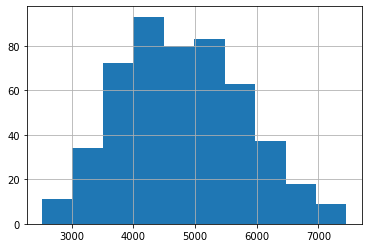

In [103]:
dataset["Daerah"].hist()

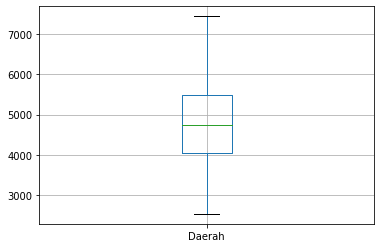

In [104]:
dataset.boxplot("Daerah")

#### SumbuUtama

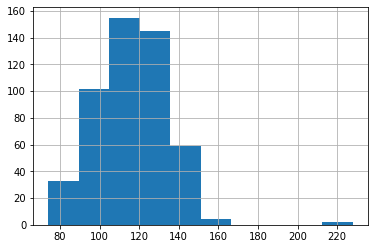

In [105]:
dataset["SumbuUtama"].hist()

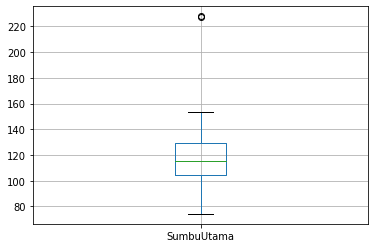

In [106]:
dataset.boxplot("SumbuUtama")

#### SumbuKecil

SumbuKecil


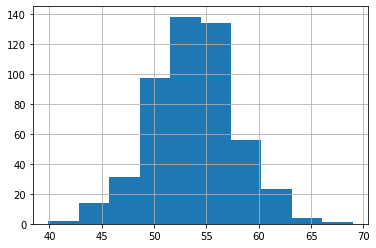

In [98]:
dataset["SumbuKecil"].hist()

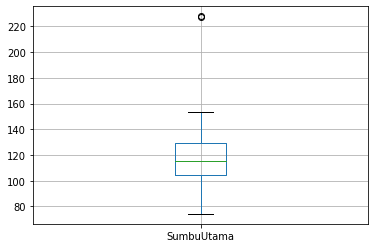

In [107]:
dataset.boxplot("SumbuUtama")

#### Keunikan

Keunikan


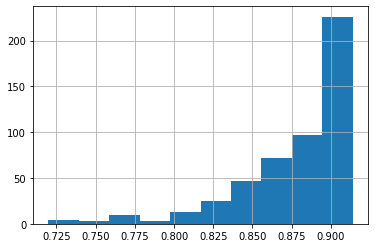

In [97]:
dataset["Keunikan"].hist()

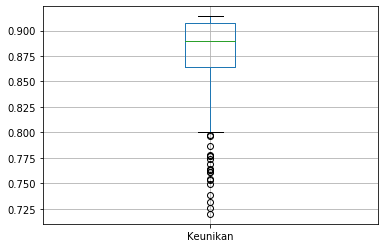

In [108]:
dataset.boxplot("Keunikan")

#### AreaBulatan

AreaBulatan


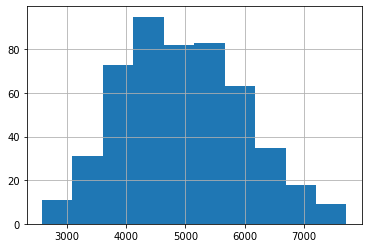

In [96]:
dataset["AreaBulatan"].hist()

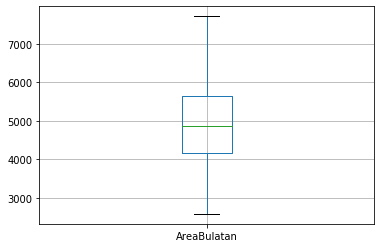

In [109]:
dataset.boxplot("AreaBulatan")

#### Diameter

Diameter


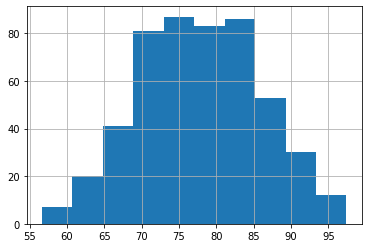

In [95]:
dataset["Diameter"].hist()

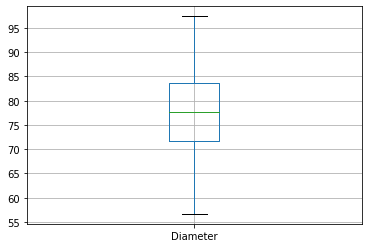

In [110]:
dataset.boxplot("Diameter")

#### KadarAir

KadarAir


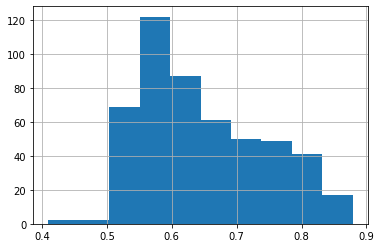

In [94]:
dataset["KadarAir"].hist()

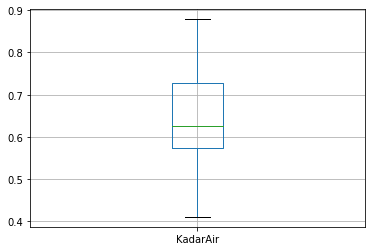

In [111]:
dataset.boxplot("KadarAir")

#### Keliling

Keliling


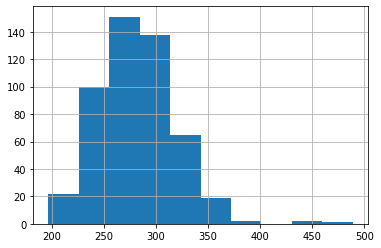

In [93]:
dataset["Keliling"].hist()

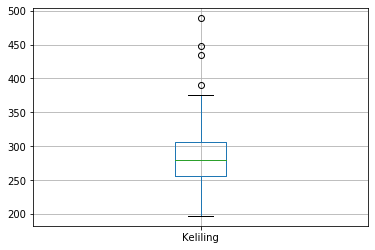

In [112]:
dataset.boxplot("Keliling")

#### Bulatan

Bulatan


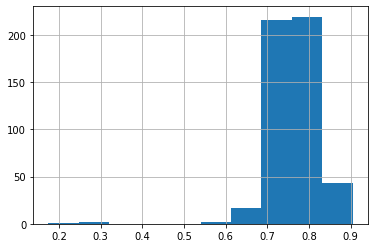

In [92]:
dataset["Bulatan"].hist()

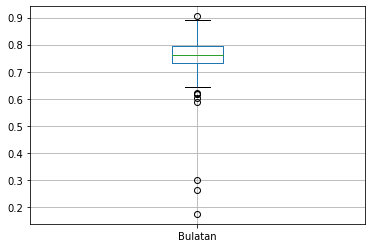

In [113]:
dataset.boxplot("Bulatan")

#### Ransum

Ransum


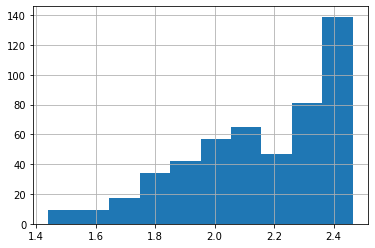

In [91]:
dataset["Ransum"].hist()

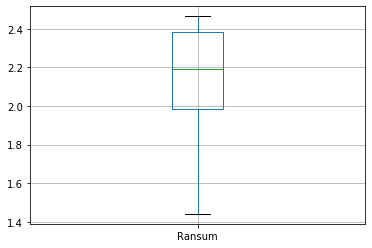

In [115]:
dataset.boxplot("Ransum")

### 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak 
Gunakan normality test yang dikaitkan dengan histogram plot.

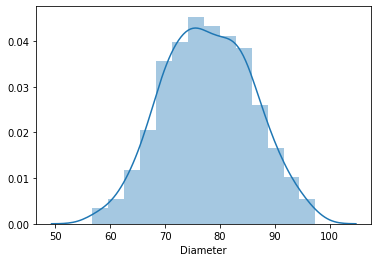

In [18]:
sns.distplot(dataset["Diameter"])

In [17]:
# D’Agostino’s K-squared test dan Shapiro-Wilk Test
# Normality test dengan menggunakan skewness dan kurtosis pada setiap kolom

from scipy.stats import normaltest, shapiro
numeric_columns = ["Daerah", "SumbuUtama", "SumbuKecil", 
                   "Keunikan", "AreaBulatan", "Diameter", 
                   "KadarAir", "Keliling", "Bulatan", "Ransum"]
for column in numeric_columns:
    print("Kolom " + column)
    stat1, p1 = normaltest(dataset[column])
    stat2, p2 = shapiro(dataset[column])
    print("D’Agostino’s Test : stat=%.3f, p=%.3f" % (stat1, p1))
    print("Shapiro-Wilk Test : stat=%.3f, p=%.3f" % (stat2, p2))
    if(p1 > 0.05 and p2 > 0.05):
        print("Berdistribusi Normal")
    elif(p1 <= 0.05 and p2 <= 0.05):
        print("Tidak Berdistribusi Normal")
    else:
        print("Masing-masing test menghasilkan kesimpulan yang berbeda")
    print()

Kolom Daerah
D’Agostino’s Test : stat=10.859, p=0.004
Shapiro-Wilk Test : stat=0.991, p=0.003
Tidak Berdistribusi Normal

Kolom SumbuUtama
D’Agostino’s Test : stat=95.120, p=0.000
Shapiro-Wilk Test : stat=0.951, p=0.000
Tidak Berdistribusi Normal

Kolom SumbuKecil
D’Agostino’s Test : stat=3.698, p=0.157
Shapiro-Wilk Test : stat=0.997, p=0.423
Berdistribusi Normal

Kolom Keunikan
D’Agostino’s Test : stat=158.617, p=0.000
Shapiro-Wilk Test : stat=0.831, p=0.000
Tidak Berdistribusi Normal

Kolom AreaBulatan
D’Agostino’s Test : stat=10.739, p=0.005
Shapiro-Wilk Test : stat=0.990, p=0.002
Tidak Berdistribusi Normal

Kolom Diameter
D’Agostino’s Test : stat=7.446, p=0.024
Shapiro-Wilk Test : stat=0.995, p=0.118
Masing-masing test menghasilkan kesimpulan yang berbeda

Kolom KadarAir
D’Agostino’s Test : stat=48.756, p=0.000
Shapiro-Wilk Test : stat=0.947, p=0.000
Tidak Berdistribusi Normal

Kolom Keliling
D’Agostino’s Test : stat=67.465, p=0.000
Shapiro-Wilk Test : stat=0.969, p=0.000
Tidak Ber

### 4. Melakukan test hipotesis 1 sampel dan menuliskan 6 langkah testing 
Menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.
- Nilai rata-rata Daerah di atas 4700?
- Nilai Rata-rata Sumbu Utama tidak sama dengan 116?
- Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?
- Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?
- Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?

### 5. Melakukan test hipotesis 2 sampel dan menuliskan 6 langkah testing
Menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.
- Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
- Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?
- Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?
- Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?
- Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?

### 6. Test korelasi
Tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.